# Lesson 07

In [30]:
import PIL.ImageFilter as ImageFilter

In [31]:
import bqplot

If the above doesn't work, try uncommenting below:

In [32]:
#!conda install -c conda-forge bqplot --yes
import bqplot

You may have to do:

In [33]:
#!jupyter nbextension enable --py bqplot

### or instead
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix

#import bqplot

Note: it is possible you may have to refresh your browser or close and reopen anaconda and jupyter notebook after you install this.

Try out this interactive plot.  You should be able to pan and zoom.  Don't worry about the code right now, we'll get to it in week 03.

In [34]:
x = np.arange(100)
y = np.random.random(100) + 5

x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()

lines = bqplot.Lines(x = x, y = y, scales = {'x': x_sc, 'y': y_sc})

ax_x = bqplot.Axis(scale = x_sc, label = 'x value')
ax_y = bqplot.Axis(scale = y_sc, label = 'y value', orientation = 'vertical')

pz = bqplot.interacts.PanZoom( scales = {'x': [x_sc], 'y': [y_sc]} )
bqplot.Figure(marks = [lines], axes = [ax_x, ax_y], interaction = pz)

Figure(axes=[Axis(label='x value', scale=LinearScale()), Axis(label='y value', orientation='vertical', scale=L…

Note, if the above doesn't work you can try replacing:

```python
bqplot.Figure(marks = [lines], axes = [ax_x, ax_y], interaction = pz)
```

with

```python
display(bqplot.Figure(marks = [lines], axes = [ax_x, ax_y], interaction = pz))
```

In [37]:
import h5py

If the above doesn't work try uncommenting:

In [38]:
#!conda install -c anaconda h5py --yes
#import h5py

In [42]:
import requests

If the above doesn't work, you can try uncommenting the following:

In [43]:
#!conda install -c anaconda requests --yes

In [44]:
import geopandas

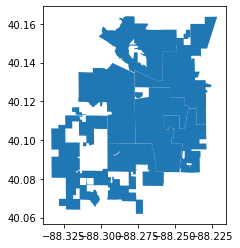

In [45]:
gdf = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')
gdf.plot()

If the above doesn't work, you can try uncommenting the following:

In [46]:
#!conda install -c conda-forge geopandas --yes
#!conda install geopandas --yes

Install `contextify` for background maps:

In [47]:
import contextily as ctx

If the above doesn't work try uncommenting:

In [48]:
#!conda install -c conda-forge contextily --yes

Test with a map (there might be a warning printed out here about an +init that you can ignore):

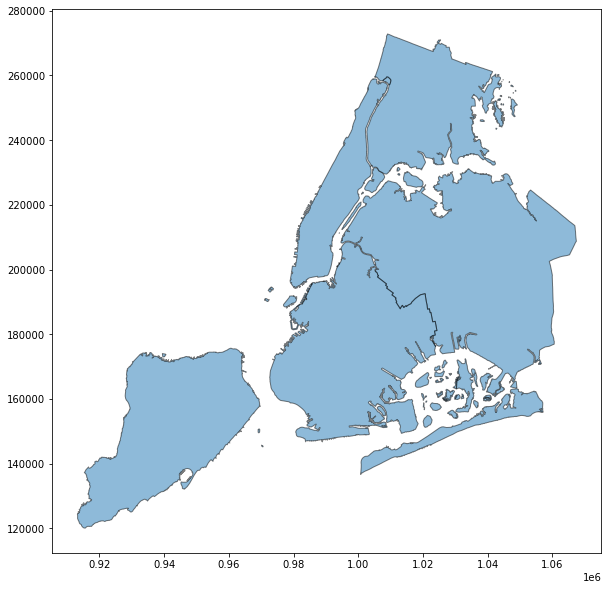

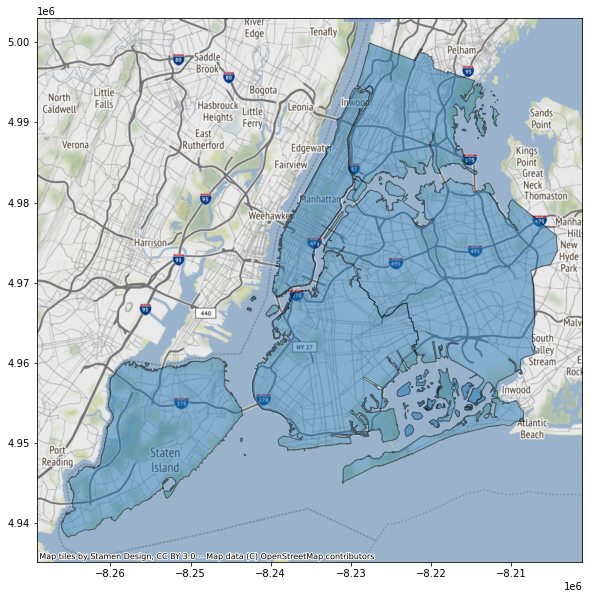

In [49]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
df = df.to_crs(epsg=3857)
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

# Lesson 09

More info here: http://www2.compute.dtu.dk/projects/GEL/PyGEL/

In [50]:
#from PyGEL3D import gel
#from PyGEL3D import js

You will probably have to pip install:

In [50]:
#!pip install PyGEL3D
#from PyGEL3D import gel
#from PyGEL3D import js

In [51]:
import ipyvolume

You will probably have to install this:

In [52]:
#!conda install -c conda-forge ipyvolume --yes
#import ipyvolume

If that doesn't work you can try:

In [53]:
#!pip install ipyvolume

You may have to uncomment the following:

In [54]:
#!jupyter nbextension enable --py --sys-prefix ipyvolume
#!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Make a test box:

In [55]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)

/opt/anaconda3/envs/myENV/lib/python3.7/site-packages/ipyvolume/serialize.py:92: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0] ** 2 + gradient[1] ** 2 + gradient[2] ** 2)


For saving movies & making animations:

In [56]:
from matplotlib import animation

In [57]:
import matplotlib.pyplot as plt
import numpy as np

def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

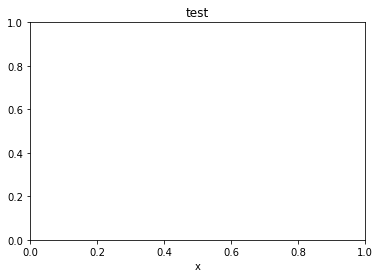

In [58]:
fig1 = plt.figure()

# Fixing random state for reproducibility
np.random.seed(19680801)

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

To save you can try:

In [59]:
line_ani.save('anim.mp4')

Or you might have to install ffmpeg and specify it as a writer:

In [60]:
# I think its this one 
#  you might have to restart kernel after this
#!conda install -c conda-forge ffmpeg --yes 

# you can also install imagemagick or use it as a writer!

In [61]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
line_ani.save('anim.mp4')

Now open and look:

In [62]:
from IPython.display import Video

In [63]:
Video("anim.mp4",width=800)